Credit Card Transaction Fraud Detection is essential for customer security. The dataset used to train the classification model based on logistic regression is a highly unbalanced dataset in which the positive class (frauds) accounts for 0.172% of all transactions. It contains transactions made by credit cards in September 2013 by European cardholders. Features V1 to V28 are not the original features and they are also scaled due to confidentiality issues

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

# Logistic Regression Implementation With Regularization 

In [2]:
def liner_modle (x,w,b):
    m = x.shape[0]
    f_wb = []
    for i in range(m):
        f_wb.append(np.dot(w,x[i]) + b) 
    return f_wb

In [3]:
def logistic_model (z):
    z = np.array(z)
    g_z = 1/(1+(np.exp(-z)))
    return g_z

In [4]:
def Cost_logistic_regularized (x,y,w,b,lamda):
    f_wb = logistic_model(liner_modle(x,w,b))
    loss = []
    reg = []
    m,n = x.shape
    for i in range(m):
        loss.append( y[i]*np.log(f_wb[i]) + (1-y[i])*np.log(1-f_wb[i]))
    for j in range(n):
        reg.append(w[j]**2)
    total_cost = sum(loss) / -m + (lamda/(2*m))*sum(reg)
    return  total_cost

In [5]:
def gradent_regularized (x,y,w,b,lamda):
    m,n =x.shape
    f_wb = logistic_model(liner_modle(x,w,b))
    dj_dw = []
    dj_db = []
    for j in range(n):
        cost = []
        for i in range(m):
            cost.append((f_wb[i]-y[i])*x[i][j])
        dj_dw.append(sum(cost)/m + (lamda/m)*w[j])
    
    for i in range(m):
        dj_db.append((f_wb[i]-y[i]))
    
    return dj_dw,sum(dj_db)/m 

In [44]:
def gradent_descent(x,y,w,b,alpha,num_iter,lamda):
    for i in range(num_iter):
        dj_dw ,dj_db = gradent_regularized(x,y,w,b,lamda)
        w = w - alpha * np.array(dj_dw)
        b = b - alpha * dj_db
        
        if i%1000 == 0:
            print ("iter {}: w = {} & b = {} ".format(i,w,b))
            
    print("the optimal value for w = {} & b = {}".format(w,b))
    return w,b

# Loading dataset

In [45]:
df0 = pd.read_csv("creditcard.csv")

# Exploring the data

In [46]:
df0.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [47]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [48]:
df0.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [49]:
# some statestical parameters about the amount of mony that corresponds to all transactions
df0["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [50]:
frq = pd.DataFrame(df0.groupby("Class").count()["V1"]).reset_index()
frq

,Class,V1
0,0,284315
1,1,492


In [51]:
# dataset is impalanced 
print("{} % of dataset are legit ===> 0".format((284315/284807)*100))
print("{} % of dataset are fraud ===>1".format((492/284807)*100))  

99.82725143693798 % of dataset are legit ===> 0
0.1727485630620034 % of dataset are fraud ===>1


In [52]:
pd.DataFrame(df0.isnull().sum())

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [53]:
df0.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

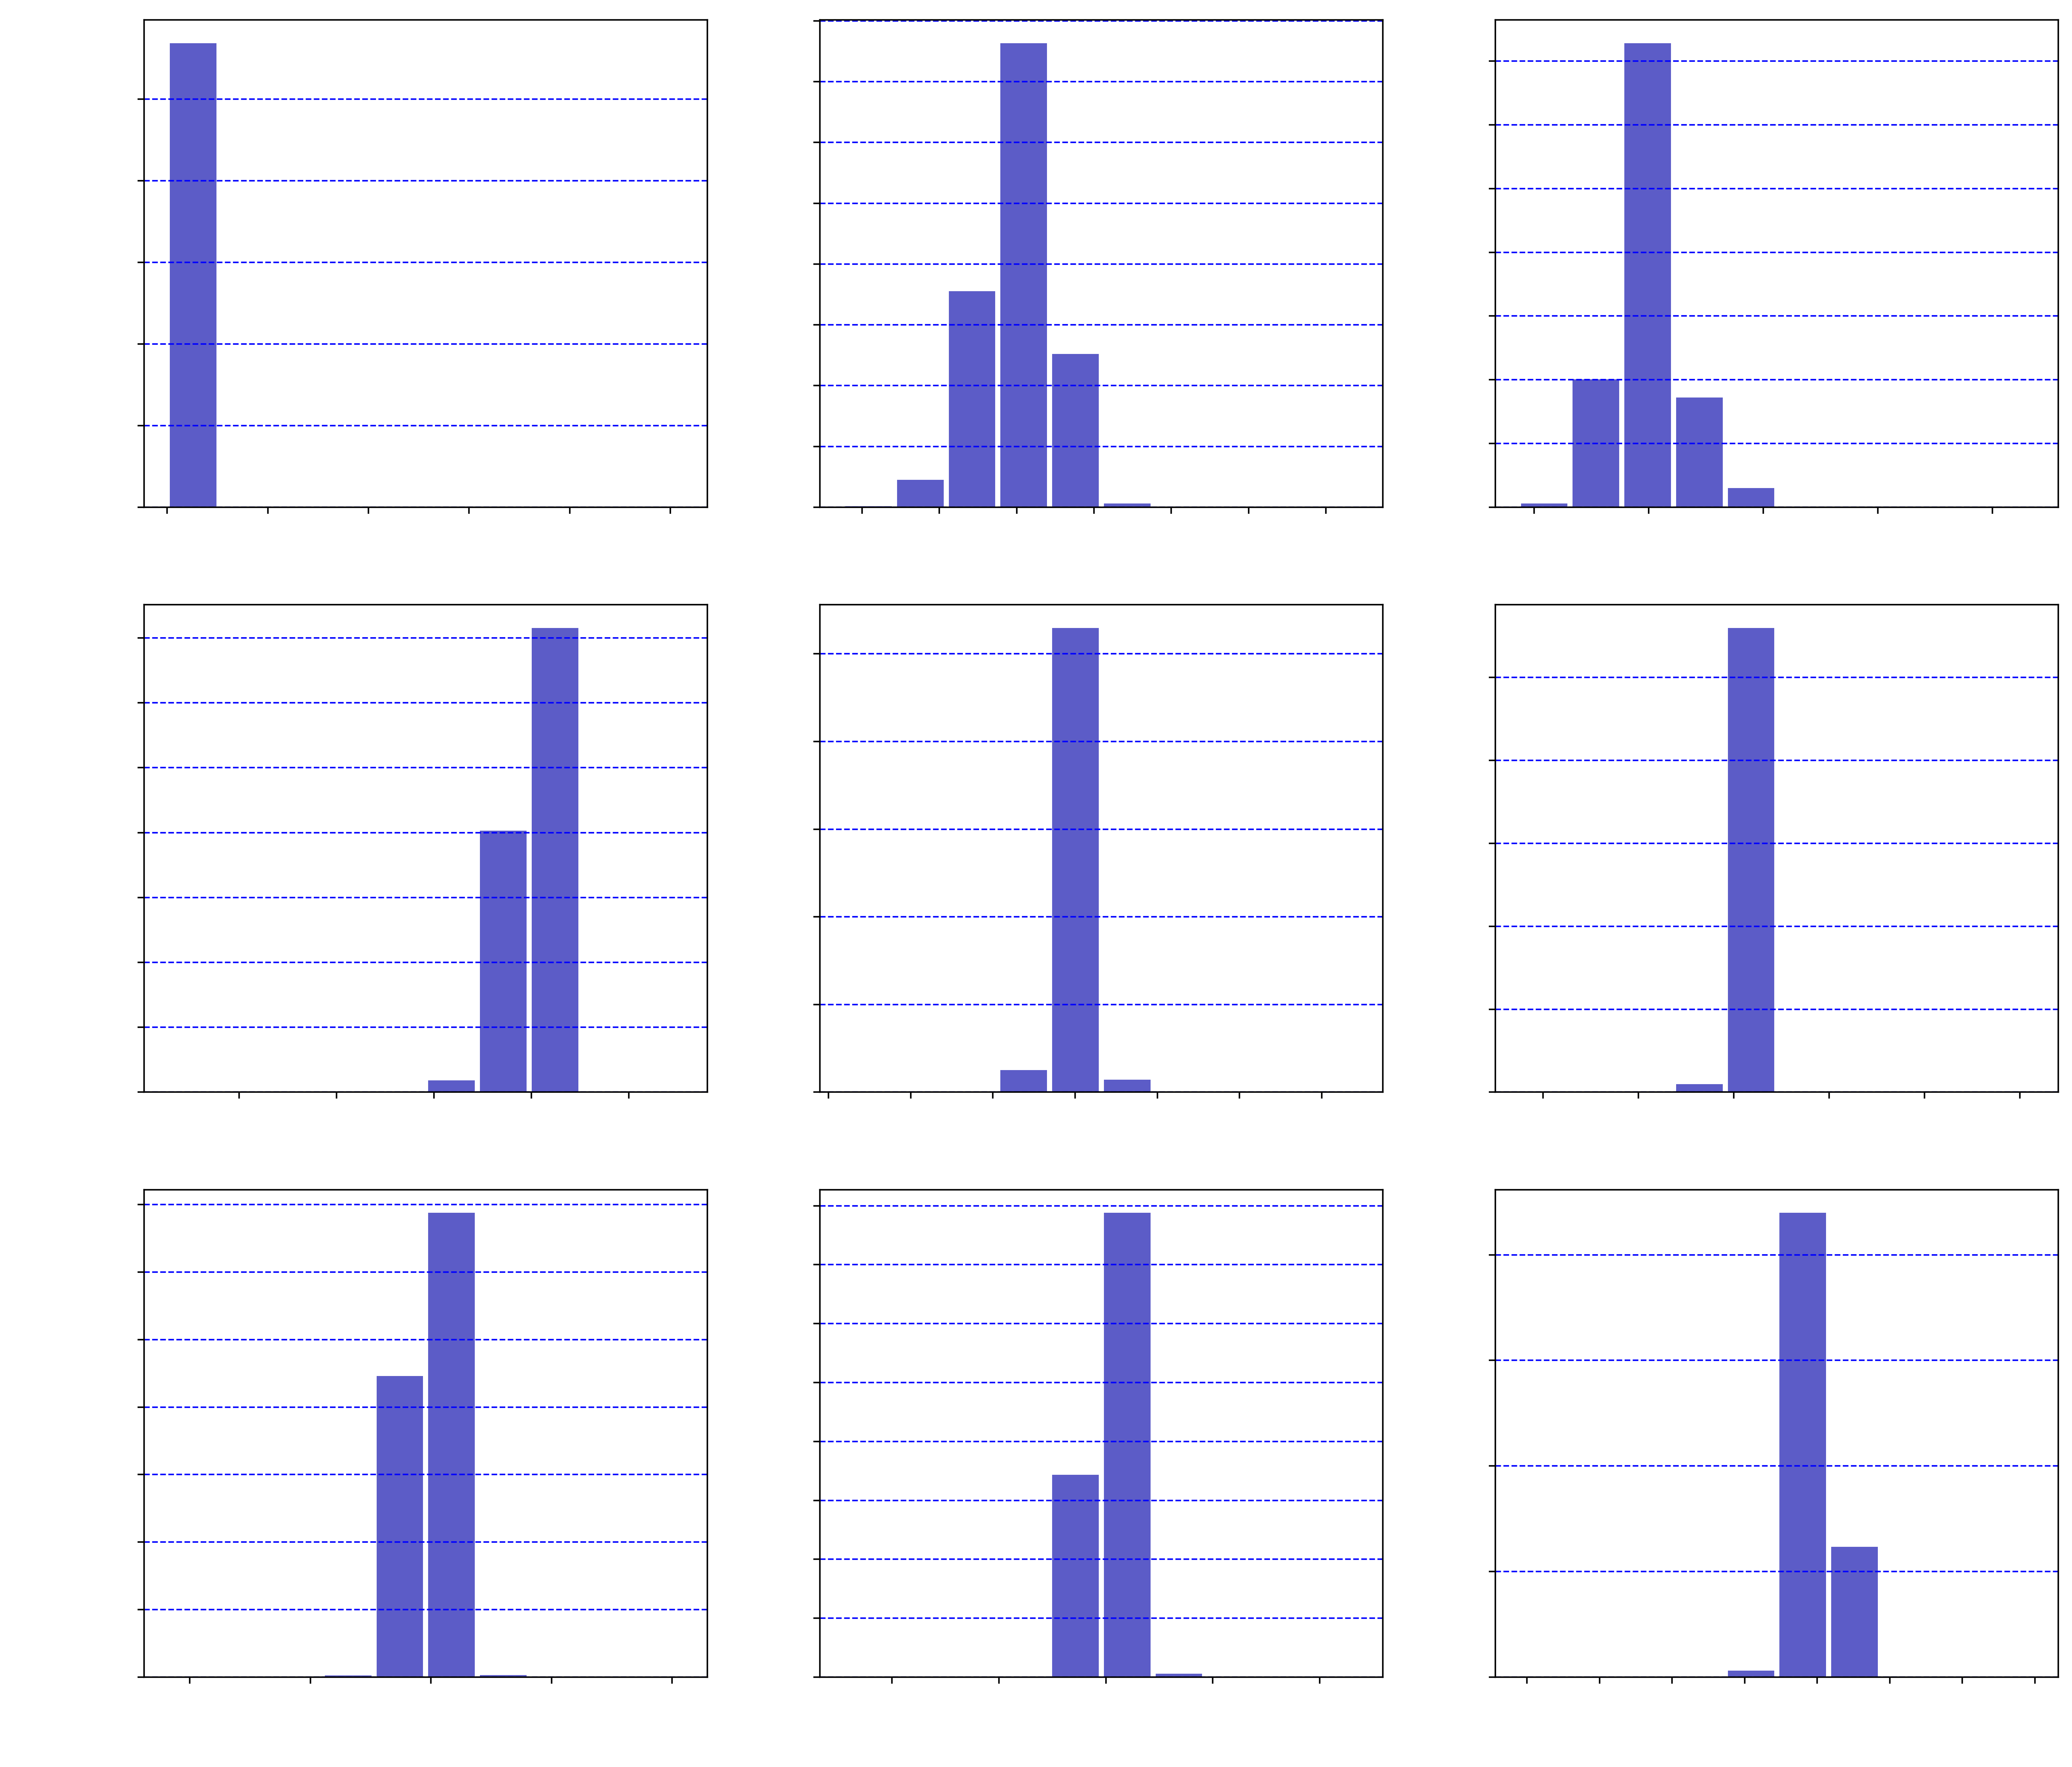

In [54]:
plt.figure()
features = ['Amount','V15','V4', 'V12', 'V16','V27','V22','V10','V25']
l = len(features)
plt.figure(figsize=(18,16),dpi = 400)
for i in range (l):
    plt.subplot(3,3,i+1)
    plt.hist(df0[features[i]],color='#0504aa',alpha = 0.65,rwidth=0.9)
    plt.xlabel(features[i],size = 20,color = "w")
    if i == 0 or i == 3 or i == 6:
        plt.ylabel("Frequancy",size = 20,color = "w")
        
    plt.xticks(c = "w")
    plt.yticks(c = "w")

    
    plt.grid(axis = "y" , linestyle = "--",color = "b")
plt.show()

<Figure size 432x288 with 0 Axes>

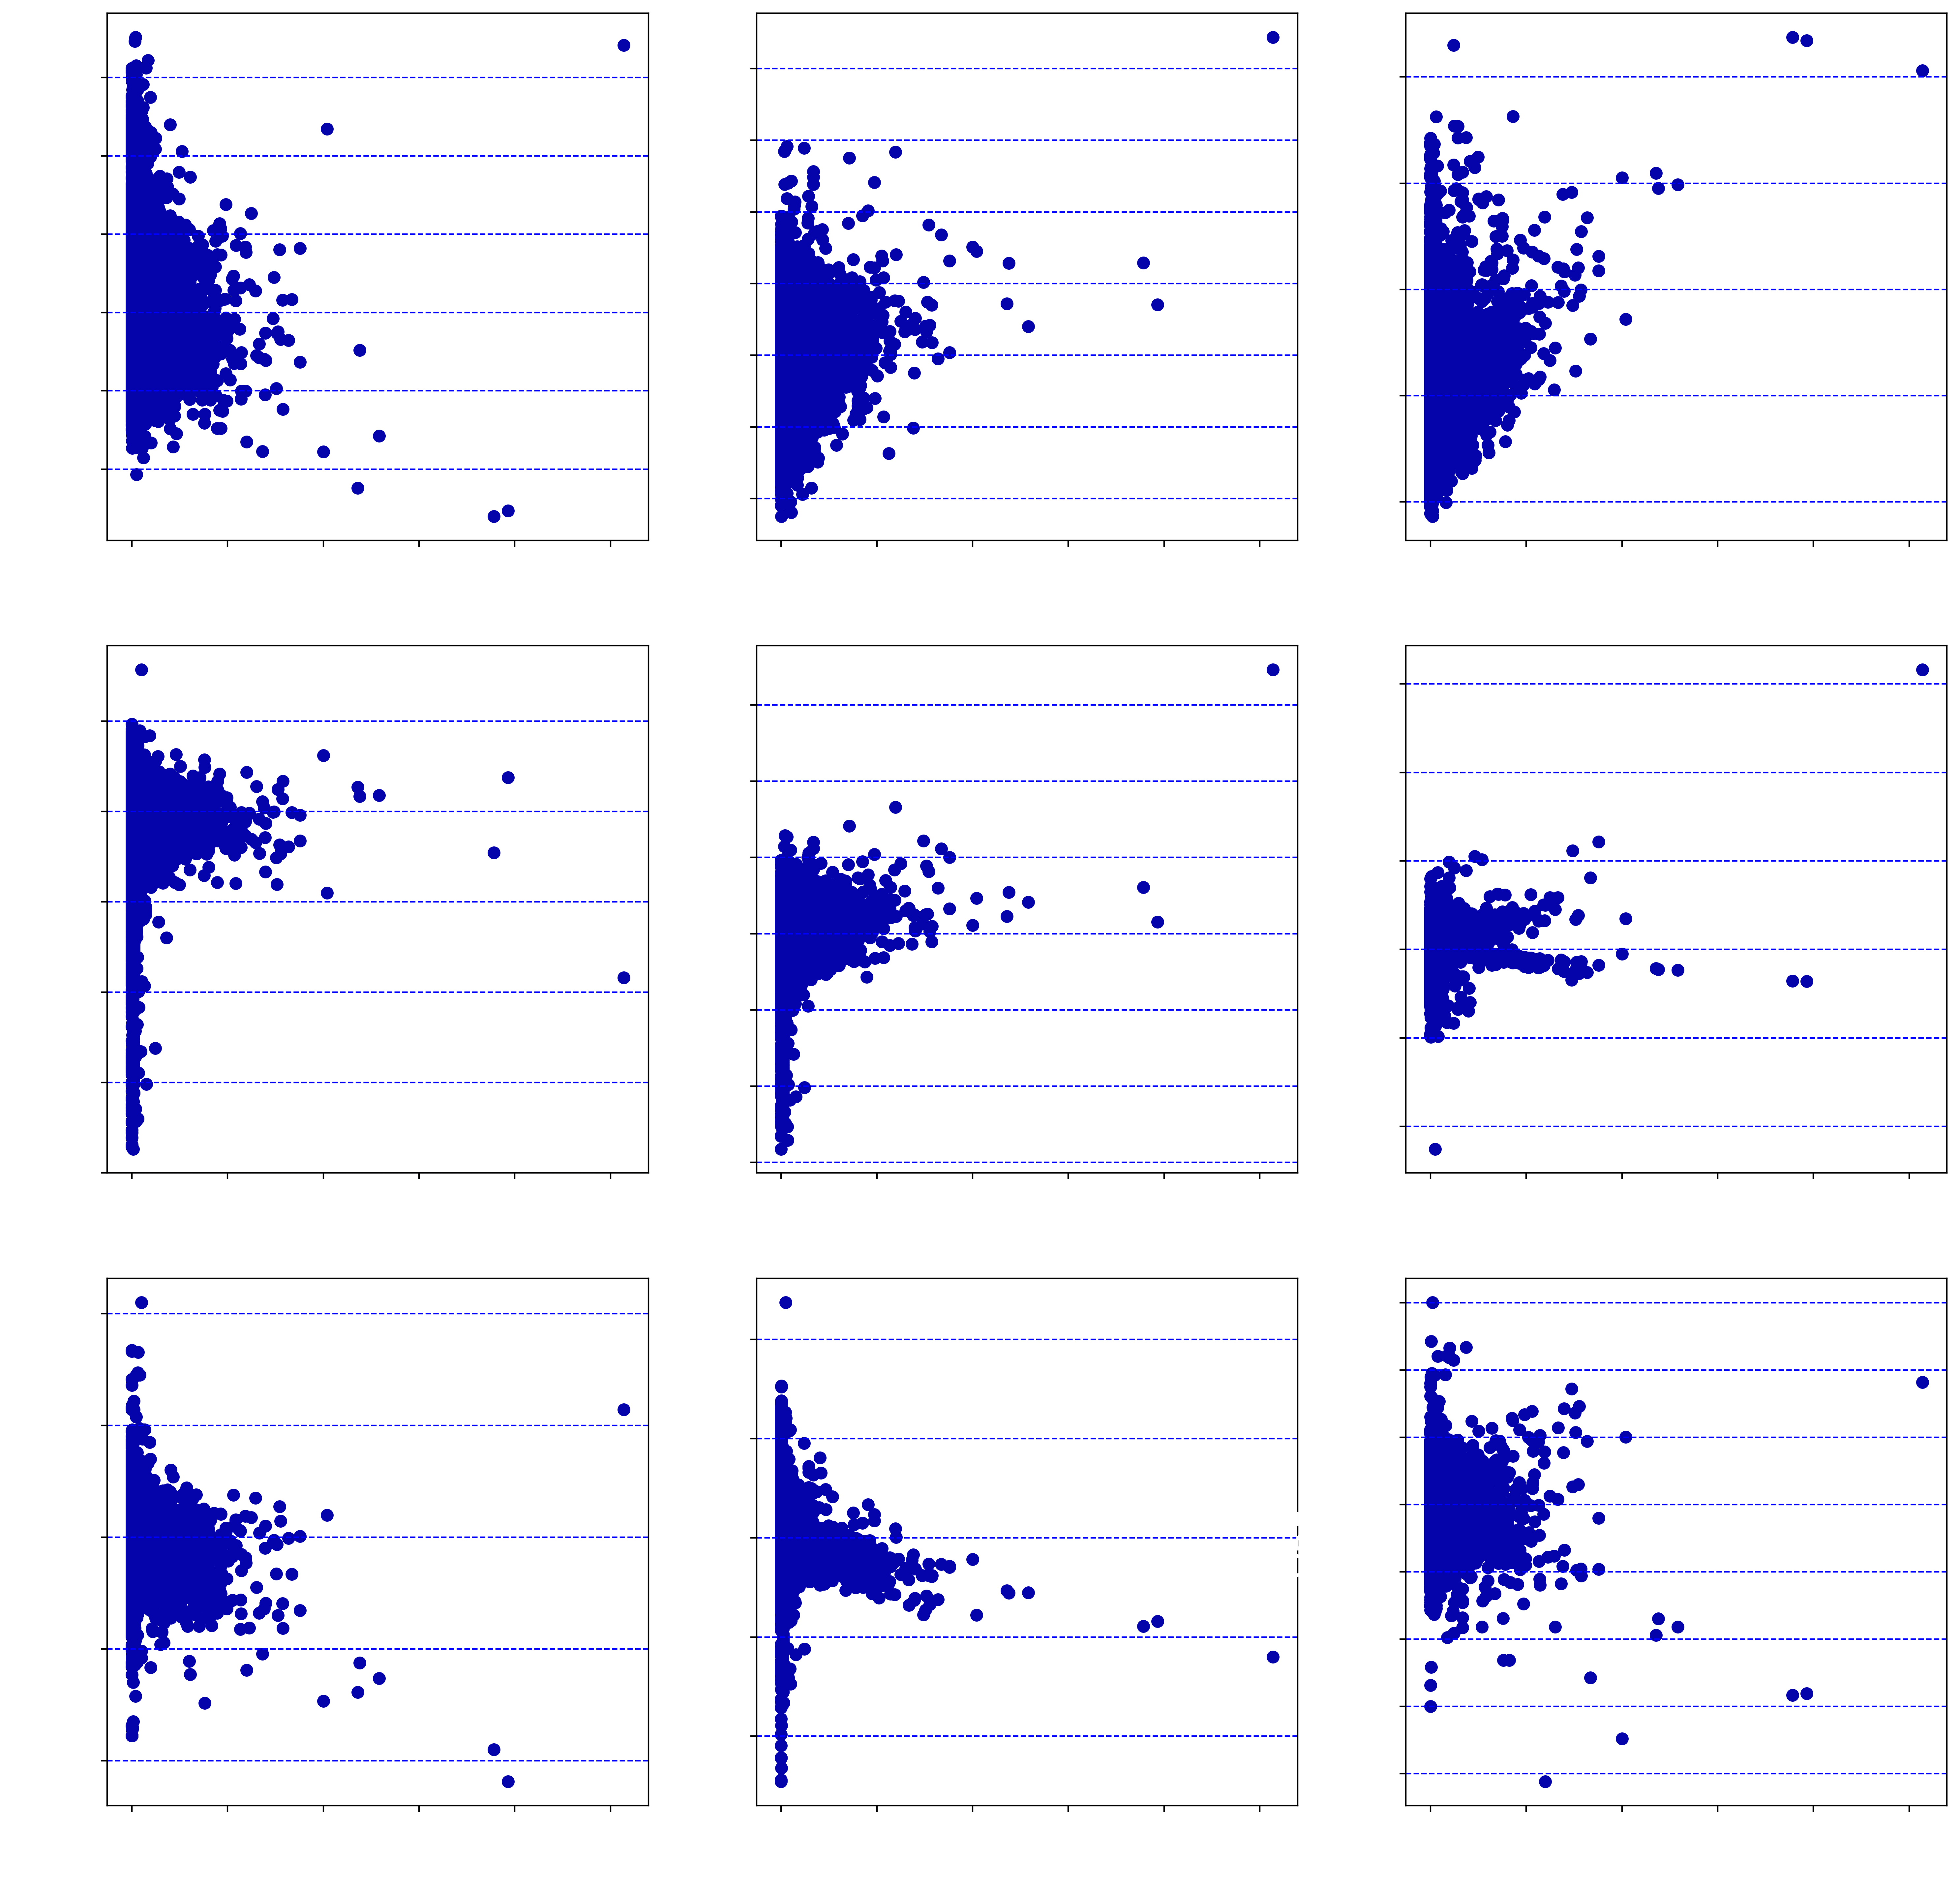

In [87]:
plt.figure()
features = ['V26','V15','V4', 'V12', 'V16','V27','V22','V10','V25']
l = len(features)
plt.figure(figsize=(18,18),dpi = 400)
for i in range (l):
    plt.subplot(3,3,i+1)
    plt.scatter(df0[ 'Amount'],df0[features[i]],color='#0504aa')
    plt.xlabel( 'Amount',size = 20,color = "w")
    plt.ylabel(features[i],size = 20,color = "w")
        
    plt.xticks(c = "w")
    plt.yticks(c = "w")
    
    plt.grid(axis = "y" , linestyle = "--",color = "b")
plt.show()

# Creating a Balanced Dataset 

In [56]:
legit = df0.loc[df0["Class"] == 0]
fraud = df0.loc[df0["Class"] == 1]
# sampling the legit data (class = 0) ==> get 492 randome sample from it 
legit_492 = legit.sample(n =492 )
legit_492

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
41031,40506.0,0.976980,-0.296892,0.357107,0.481090,0.325731,1.604798,-0.370043,0.480917,0.467769,...,-0.172816,-0.257597,0.118111,-1.270608,0.048374,0.430204,0.042260,0.006344,52.98,0
4265,3755.0,1.221771,-0.563067,0.753453,-0.477010,-1.136807,-0.768354,-0.632567,-0.172987,0.194818,...,-0.137185,-0.449932,0.097303,0.457367,0.131663,-0.557667,-0.031432,0.020355,76.50,0
101913,67979.0,-0.648589,1.444939,0.508225,2.694279,0.301771,0.470930,0.161776,0.615122,-1.700889,...,0.133836,0.319938,-0.047259,-0.306542,-0.444355,0.188197,0.124266,0.034794,21.69,0
155260,104941.0,-0.787811,0.399675,2.161272,1.455416,-1.637986,2.333149,-1.289976,-2.049567,2.313143,...,2.177358,-0.491003,-1.167038,-0.478225,1.294790,-0.125675,0.465056,0.098814,278.00,0
265643,161976.0,0.746078,-3.011702,-2.362927,-0.169686,-0.766432,0.076161,0.564271,-0.324009,-0.998748,...,0.339878,-0.159781,-0.557488,0.303604,-0.291162,0.694320,-0.204391,0.057814,749.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74575,55652.0,-1.867667,-0.312421,1.160645,1.938608,0.427463,-0.998179,-0.427085,0.504167,-0.658327,...,0.173399,0.281661,0.262946,0.387406,0.413666,-0.025445,-0.171327,-0.114366,6.26,0
21005,31409.0,1.333728,0.232426,-1.708410,-0.070780,2.556949,3.062569,-0.034007,0.647466,-0.400591,...,-0.051475,-0.243130,-0.179704,1.009990,1.009982,-0.280482,-0.005862,0.003838,0.89,0
72539,54749.0,1.187289,0.119884,0.232366,1.319265,-0.065116,0.001603,-0.008318,0.066442,0.472105,...,-0.136719,-0.207957,-0.094945,-0.293711,0.675826,-0.287147,0.032440,0.010356,9.46,0
34103,37514.0,1.128212,0.183493,0.491751,1.064903,-0.469353,-0.740650,0.055133,-0.023704,-0.146930,...,-0.108857,-0.449258,0.054767,0.486366,0.361351,-0.593081,0.004766,0.021071,29.66,0


In [57]:
# some statestical parameters about the amount of mony that corresponds to legit transactions 
legit["Amount"].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [58]:
# some statestical parameters about the amount of mony that corresponds to fraud transactions 
fraud["Amount"].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [59]:
#Creating a Balanced data frame with 492 fraud  examples  and 492 legit  examples
Balanced_data  = pd.concat([legit_492,fraud],axis = 0)
print(Balanced_data.groupby("Class").count()["Amount"])

Class
0    492
1    492
Name: Amount, dtype: int64


In [60]:
Balanced_data.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,99061.347561,0.169995,0.102522,0.006347,0.024820,0.106561,0.000172,0.005282,0.017314,-0.042821,...,-0.050845,0.000188,-0.037352,0.016148,-0.006287,-0.024530,-0.053351,0.017503,0.004818,63.867724
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [61]:
x0 = Balanced_data.drop(columns=["Class","Time","Amount"])
# feature scaling
Time = Balanced_data["Time"] /172792.0 
Amount = Balanced_data["Amount"] / 25691.160

x = pd.concat([x0,Time,Amount],axis=1)
y = Balanced_data["Class"]


# Spliting data into Training and Testing data

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2)
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
w_init = [-100.68945558,   35.2478747,  -148.83462087,  163.96260462,  -64.21715191,
  -35.36493744,  -80.81419172, -34.63329371, -58.86985964,-219.05750797,
  144.84037738, -258.37861001, -45.89664322, -252.75753694, -8.02281702,
 -178.70256422, -328.12503387, -126.80404115,  59.70566869, -20.7805349,
    0.57968311,   30.19363772,  -26.55818053,  -0.89159735, -19.76165642,
  -18.21468873,   33.40571354,    5.85047169,  3.58037642, -52.49714916]
b_init = -503.658

# Training The Model

In [63]:
w,b= gradent_descent(x_train,y_train,w_init,b_init,0.3,8000,0.1)

iter 0: w = [-100.67958855   35.24849601 -148.83048819  163.97852079  -64.20649302
  -35.36553216  -80.81254436  -34.63610344  -58.87067123 -219.04998489
  144.8378793  -258.37354941  -45.89775423 -252.75363129   -8.02522559
 -178.69090118 -328.10493995 -126.79642587   59.69818599  -20.77981992
    0.58007809   30.19301679  -26.56315994   -0.89329057  -19.75960571
  -18.21362409   33.40513912    5.85119476    3.58781282  -52.4950913 ] & b = -503.64329742992356 


C:\Users\dell\AppData\Local\Temp/ipykernel_2944/3945477271.py:3: RuntimeWarning: overflow encountered in exp
  g_z = 1/(1+(np.exp(-z)))


iter 1000: w = [-9.14583604e+01  3.45732425e+01 -1.44140214e+02  1.76780436e+02
 -5.46640500e+01 -3.57023178e+01 -7.89510797e+01 -3.65982280e+01
 -5.88818190e+01 -2.11511463e+02  1.41001329e+02 -2.52700510e+02
 -4.53346745e+01 -2.46796632e+02 -1.08236055e+01 -1.68511635e+02
 -3.10319698e+02 -1.20469907e+02  5.34287130e+01 -1.96156357e+01
  1.59905232e-01  3.01205138e+01 -3.13397236e+01 -2.28892478e+00
 -1.79960427e+01 -1.73973754e+01  3.26323957e+01  6.46895434e+00
  1.05322985e+01 -5.04761364e+01] & b = -490.1328146907838 
iter 2000: w = [ -85.05009132   32.49560337 -138.03187608  183.00336507  -49.00861822
  -34.78370934  -75.09738467  -38.35915339  -59.02652061 -204.15848627
  135.44968433 -245.35771941  -44.3037991  -237.93023574  -11.63234602
 -160.59984991 -296.70618852 -115.92316921   49.9593738   -17.8028805
   -0.43377143   30.68784068  -32.57654486   -3.52143688  -16.19363437
  -16.80662474   31.68811602    6.90168621   16.17024231  -48.5331114 ] & b = -478.9204627916193 
ite

In [80]:
z = liner_modle(x_test,w,b)
predection = 100*logistic_model(z)

C:\Users\dell\AppData\Local\Temp/ipykernel_2944/3945477271.py:3: RuntimeWarning: overflow encountered in exp
  g_z = 1/(1+(np.exp(-z)))


In [81]:
list(predection)
y_predection = []
for i in range (len(predection)):
    if predection[i] >= 50:
        y_predection.append(1)
        print (
        "example:{} is {} % Fraudulent Transaction ===> Fraudulent Transaction".format(i+1,predection[i])
              )
    else:
        y_predection.append(0)
        print (
        "example:{} is {} % Fraudulent Transaction ===> legitimate Transaction".format(i+1,predection[i])
              )
y_predection = np.array(y_predection)

example:1 is 5.314162053531303e-203 % Fraudulent Transaction ===> legitimate Transaction
example:2 is 100.0 % Fraudulent Transaction ===> Fraudulent Transaction
example:3 is 1.5635501625692387e-199 % Fraudulent Transaction ===> legitimate Transaction
example:4 is 100.0 % Fraudulent Transaction ===> Fraudulent Transaction
example:5 is 4.2370599235954604e-60 % Fraudulent Transaction ===> legitimate Transaction
example:6 is 100.0 % Fraudulent Transaction ===> Fraudulent Transaction
example:7 is 1.0033893892654372e-173 % Fraudulent Transaction ===> legitimate Transaction
example:8 is 100.0 % Fraudulent Transaction ===> Fraudulent Transaction
example:9 is 2.529064531492067e-70 % Fraudulent Transaction ===> legitimate Transaction
example:10 is 2.0233051407698484e-166 % Fraudulent Transaction ===> legitimate Transaction
example:11 is 100.0 % Fraudulent Transaction ===> Fraudulent Transaction
example:12 is 4.236987112202342e-263 % Fraudulent Transaction ===> legitimate Transaction
example:13 i

In [82]:
y_test

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1],
      dtype=int64)

In [83]:
y_predection

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1])

# Evaluating The Model

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predection))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        93
           1       0.92      0.90      0.91       104

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197

